# A Case Study of Data Analysis for Educational Management
 
## Abstract
The recent technology development introduces many aspects of difficulty in education management. There are many
new technologies and new businesses emerging in a single year. As a result of business sectors require a rapid changing of
curriculum from academic institutions. However, the curriculum revision has to be done in a very short time comparing to a large
amount of data to be processed, resulting in the teaching materials are often lack behind the business requirements.
Education management has to be sensitive and responsive to the constantly changing of technology environment. In this paper,
data analytic tools are applied for discovering a new dependence between courses, in order to improve the current sequence of
prerequisites. The dependence detection is made of a feature importance technique based on an extra-trees classifier. We also
compare various types of classifiers for predicting a grade of a next enrollment using the results of prior studies. The grade
prediction is designed to suggest the best study path to match individual talent.

```bibtext
    @inproceedings{limprasert_case_2016,
        title = {A Case Study of Data Analysis for Educational Management},
        eventtitle = {{JCSSE}2016},
        booktitle = {{JCSSE}2016},
        author = {Limprasert, Wasit and Kosolsombat, Somkiat},
        date = {2016-07},
    }
```

## Introduction
Grading is necessary tool for measure outcome of the sudying process. Unsuccessful lerning process may depend on many factors such as student attenction, teacher and background knowledge. In many academic instituetions, the prerequisite subjects are required before registering some particular subjects. In this project, we attempt to investigate the relationship between prerequisite grades on a grade of the paricular subject. We have aquired a anonymous enrolment records of computer science students from the registrar of Thammasat University. The records have been constantly collected for 4 years consisting of over 28,272 records.



## Loading the raw input data

In [4]:
import pandas as pd
import numpy as np
print pd.__version__
%matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
df_csv = pd.read_csv('CS_table_No2_No4_new.csv',delimiter=";",
                      skip_blank_lines = True, error_bad_lines=False)
df_csv=df_csv.dropna()

0.17.0


## Showing head

In [2]:
print df_csv.head() #get first 5 records

   STUDENTID  ACADYEAR  SEMESTER  CAMPUSID COURSEID CAMPUSNAME  CURRIC  \
0     316644      2552         1         2    CS101    RANGSIT     521   
1     316644      2552         1         2    CS102    RANGSIT     521   
2     316644      2552         1         2    EL171    RANGSIT     521   
3     316644      2552         1         2    SC135    RANGSIT     521   
4     316644      2552         1         2    SC185    RANGSIT     521   

                          COURSENAME  SECTIONGROUP  CREDIT GRADE  
0                DISCRETE STRUCTURES         10001       3     C  
1  COMPUTER PROGRAMMING FUNDAMENTALS         20301       4     C  
2                   ENGLISH COURSE 2        100003       3     D  
3                    GENERAL PHYSICS         80001       3     F  
4        GENERAL PHYSICS  LABORATORY          5401       1     C  


## Showing tail

In [36]:
print df_csv.tail() #get lat 5 records

       STUDENTID  ACADYEAR  SEMESTER COURSEID GRADE
31332     447243      2557         1    EL070    U#
31333     447243      2557         1    MA211     F
31334     447243      2557         1    ST216     F
31335     447243      2557         1    TH161     F
31336     447243      2557         1    TU154     F


# Data minning process
The normal procedures for data mininng are the following:
* data cleaning
* data transformation
* training
* evaluation
## Drop unnecessary data
    Some column are unnecessary for the prediction. We can drop them by using df.drop()
```python
        df_csv.drop(["column_name"])
```

In [37]:
column_name=df_csv.columns.values
print column_name
for i in column_name:
    print "datatype of column {} is {}.".format(i,df_csv[i].dtype)

['STUDENTID' 'ACADYEAR' 'SEMESTER' 'COURSEID' 'GRADE']
datatype of column STUDENTID is int64.
datatype of column ACADYEAR is int64.
datatype of column SEMESTER is int64.
datatype of column COURSEID is object.
datatype of column GRADE is object.


In [6]:
df_csv.drop(['CAMPUSID','CAMPUSNAME','COURSENAME','CURRIC','SECTIONGROUP','CREDIT'],
            axis=1, inplace=True)
column_name=df_csv.columns.values
print column_name
for i in column_name:
    print "datatype of column {} is {}.".format(i,df_csv[i].dtype)

['STUDENTID' 'ACADYEAR' 'SEMESTER' 'COURSEID' 'GRADE']
datatype of column STUDENTID is int64.
datatype of column ACADYEAR is int64.
datatype of column SEMESTER is int64.
datatype of column COURSEID is object.
datatype of column GRADE is object.


##  Data cleaning
    There are some records having NAN ann invalid data. We need to fix or remove them.

C     5075
C+    4939
B     4228
B+    3411
A     3187
D+    2600
D     1792
W     1690
F     1062
S#     206
S       36
U       27
U#      19
Name: GRADE, dtype: int64


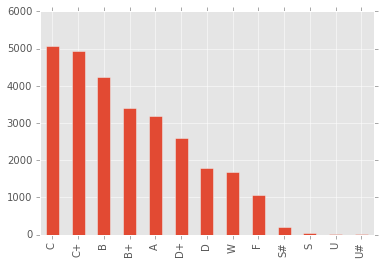

In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df=df_csv.copy()
myhist=df["GRADE"].value_counts()
print myhist
myhist.plot(kind='bar')
plt.rcParams['figure.figsize'] = (10,6)

## Converting category to numeric data

In [8]:
grade_cn={'':0, 'U#':1, 'U':1, 'S#':2, 'S':2, 'W':3, 'F':4, 'D':5, 'D+':5, 'C':6, 'C+':6, 'B':7, 'B+':7, 'A':8}
grade_list=['', 'U#','U', 'S#', 'S', 'W', 'F', 'D', 'D+', 'C', 'C+', 'B', 'B+', 'A']
[grade_cn[i] for i in grade_list]

[0, 1, 1, 2, 2, 3, 4, 5, 5, 6, 6, 7, 7, 8]

In [9]:
df2=df.copy()
df2 = df2.fillna(0)
df2 = df2.replace(grade_list, [grade_cn[i] for i in grade_list] )

## recategorizing the data
To decrease the number of categories, some additional grade are rounded down to alphabet grades.

A     3187
B     7639
C    10014
D     4392
F     1062
S      242
U       46
W     1690
Name: GRADE, dtype: int64


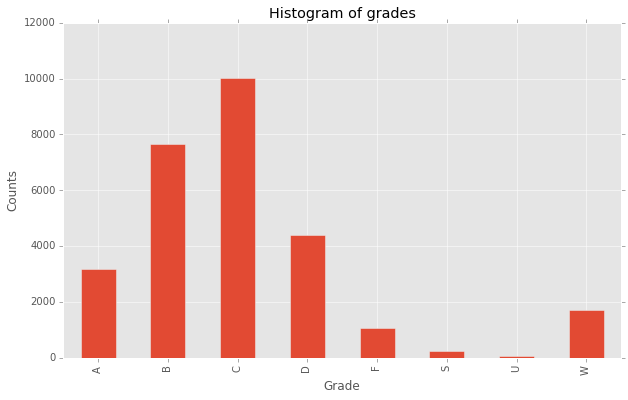

In [10]:
##noplus
grade_list_noplus=['NA', 'U',  'S', 'W', 'F', 'D',  'C',  'B',  'A']
df_noplus=df2.copy()
df_noplus = df_noplus.replace( range(9), grade_list_noplus )
myhist=df_noplus["GRADE"].value_counts().sort_index()
print myhist
myhist.plot(kind='bar')
plt.rcParams['figure.figsize'] = (6,2)
plt.title("Histogram of grades")
plt.xlabel("Grade")
plt.ylabel("Counts")

In [11]:
myhist=df["GRADE"].value_counts()
print myhist
myhist2=df2["GRADE"].value_counts()
print myhist2

C     5075
C+    4939
B     4228
B+    3411
A     3187
D+    2600
D     1792
W     1690
F     1062
S#     206
S       36
U       27
U#      19
Name: GRADE, dtype: int64
6    10014
7     7639
5     4392
8     3187
3     1690
4     1062
2      242
1       46
Name: GRADE, dtype: int64


In [12]:
df2["TERM"]=10*df2["ACADYEAR"]+df2["SEMESTER"]
df3=df2.copy()
df3.drop(["ACADYEAR","SEMESTER"],axis=1, inplace=True)

## Fields
Now, there are only 4 fields remained; **STUDENTID COURSEID GRADE** and **TERM**.

In [13]:
print df3.head()
print df3.tail()

   STUDENTID COURSEID  GRADE   TERM
0     316644    CS101      6  25521
1     316644    CS102      6  25521
2     316644    EL171      5  25521
3     316644    SC135      4  25521
4     316644    SC185      6  25521
       STUDENTID COURSEID  GRADE   TERM
31332     447243    EL070      1  25571
31333     447243    MA211      4  25571
31334     447243    ST216      4  25571
31335     447243    TH161      4  25571
31336     447243    TU154      4  25571


## Data transformation
I always test the idea on a smaller number of records because the data transforamtion takes a very long time to process.

In [14]:
#df4=df3[0:20].copy()
df4=df3

## Preparation before the transfomation
New series are allocated for the new dataframe. The new fields are sorted alphabetically.

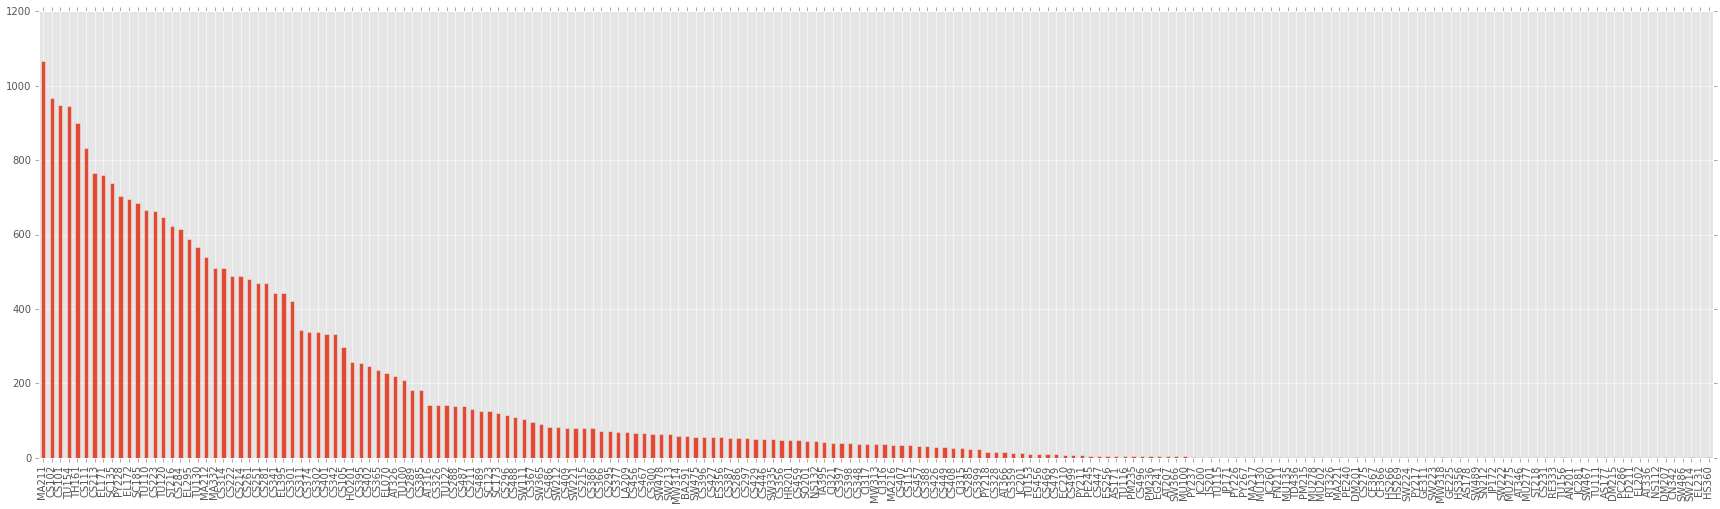

In [40]:
#create a new data frame
df5=df4.copy()
for c in df5.COURSEID.value_counts().index:
    df5[c]=pd.Series(np.zeros(df5.shape[0],dtype=int),index=df5.index)
#reindex the columns
cname=df5.columns[0:4].values.tolist() + sorted(df5.columns[4:].values)
df5=df5.reindex_axis(cname, axis=1)
plt.rcParams['figure.figsize'] = (30,8)
df5.COURSEID.value_counts().plot(kind='bar')

## Chronicle transformation
Here is the chronicle transformation process, where the all grades of previous terms are appended into the consecutive columns.

Note that this process may takes about 5 minutes.

In [17]:
%%timeit -n1
for i, ri in df5.iterrows():
    dfx=df4[ (df4["STUDENTID"] == ri["STUDENTID"]) & (df4["TERM"] < ri["TERM"]) ]
    if(dfx.shape[0]):
        for j,rj in dfx.iterrows():
            df5.loc[i,rj["COURSEID"]]=rj["GRADE"]

1 loop, best of 3: 5min 30s per loop


## Storing the result

In [18]:
import os
path='df_noplus'
if not os.path.exists(path):
    os.makedirs(path)
df5.to_pickle(path+"/df5.pkl")
#df = pd.read_pickle("df5.pkl")

## The final check
Here we is finishing the preparation and the transformation processes. Before we go to the traning process, please have a look to our final dataframe.

In [42]:
#import pandas as pd
#import numpy as np
path='df_noplus'
df6 = pd.read_pickle(path+"/df5.pkl")

In [43]:
df6

,STUDENTID,COURSEID,GRADE,TERM,AN201,AS171,AS177,AS178,AT207,AT316,AT326,AT336,AT346,AT366,BA291,CF366,CF367,CJ315,CJ316,CJ317,CJ321,CN342,CS101,CS102,CS105,CS111,CS115,CS211,CS213,CS214,CS215,CS222,CS223,CS231,CS251,CS261,CS275,CS281,CS284,CS285,CS286,CS288,CS289,CS295,CS296,CS297,CS300,CS301,CS302,CS311,CS314,CS326,CS328,CS341,CS342,CS348,CS356,CS359,CS365,CS366,CS367,CS374,CS377,CS385,CS386,CS387,CS388,CS395,CS396,CS397,CS398,CS399,CS401,CS402,CS407,CS408,CS409,CS426,CS427,CS429,CS446,CS447,CS449,CS456,CS457,CS459,CS467,CS469,CS479,CS486,CS487,CS488,CS489,CS496,CS499,DM201,DM207,DM215,EC210,EG241,EL070,EL171,EL172,EL202,EL231,EL295,EL395,ES256,ES356,ES456,FD211,FN211,GE225,GE311,HO201,HR201,HS266,HS269,HS356,HS360,IS201,JC200,JC201,JC260,JC281,JP171,JP172,LA209,MA211,MA212,MA216,MA217,MA221,MA332,MU100,MU130,MU135,MU202,MU275,MU277,MU278,MW313,MW314,MW318,NS112,NS132,PC286,PE240,PE245,PM215,PM235,PM236,PY211,PY217,PY218,PY226,PY228,PY237,PY267,RE333,RT326,SC123,SC135,SC173,SC185,SN212,SO201,ST216,ST218,SW111,SW212,SW213,SW214,SW221,SW222,SW223,SW224,SW335,SW365,SW366,SW467,SW475,SW478,SW486,SW489,TA395,TD436,TH161,TU100,TU110,TU111,TU115,TU116,TU120,TU122,TU130,TU153,TU154,TU156
0,316644,CS101,6,25521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316644,CS102,6,25521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,316644,EL171,5,25521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,316644,SC135,4,25521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,316644,SC185,6,25521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,316644,TH161,6,25521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,316644,TU154,5,25521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,